In [41]:
import pandas as pd
import pingouin
import scipy
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import seaborn as sns

In [2]:
data1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-pozdniakov/statistic/5_task_1.csv')
data2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-pozdniakov/statistic/5_task_2.csv')

In [9]:
pingouin.homoscedasticity(data=data1, dv='events', group='group')

,W,pval,equal_var
levene,2.26226,0.104133,True


In [12]:
scipy.stats.levene(data1.query('group=="A"').events, data1.query('group=="B"').events, data1.query('group=="C"').events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

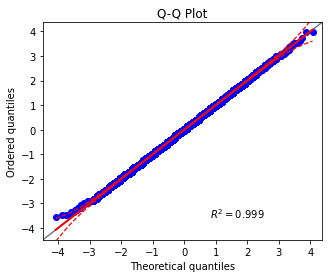

In [22]:
scipy.stats.normaltest(data1.query('group=="A"').events)
scipy.stats.normaltest(data1.query('group=="B"').events)
scipy.stats.normaltest(data1.query('group=="C"').events)
pingouin.qqplot(data1.events)

In [23]:
pingouin.anova(data=data1, dv='events', between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [32]:
MultiComp = MultiComparison(data1.events, data1.group)

print(MultiComp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


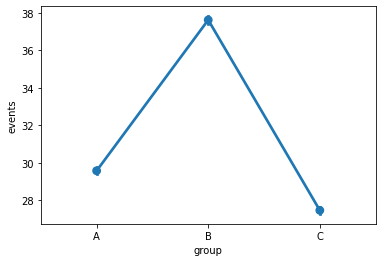

In [34]:
sns.pointplot(data=data1, x='group', y='events')

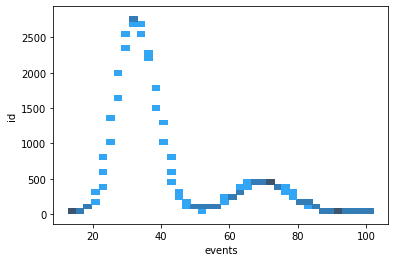

In [63]:
a= data2.query('group == "test"').groupby('events', as_index=False).agg({'id':'count'})
b = data2.query('group == "test"')
sns.histplot(a, x='events', y='id', bins=40)

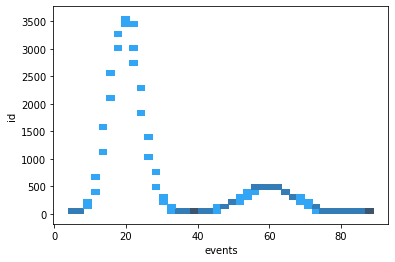

In [64]:
a= data2.query('group == "control"').groupby('events', as_index=False).agg({'id':'count'})
b = data2.query('group == "control"')
sns.histplot(a, x='events', y='id', bins=40)

In [68]:
data2.groupby(['group','segment'], as_index=False).agg({'events':'describe', 'events':'std'})

,group,segment,events
0,control,high,7.805347
1,control,low,4.473576
2,test,high,8.403974
3,test,low,5.720845


In [69]:
pingouin.anova(data=data2, dv='events', between=['group','segment'])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [72]:
data2['comb'] = data2['group'] + '/' + data2['segment']
MultiComp = MultiComparison(data2.events, data2.comb)

print(MultiComp.tukeyhsd().summary())

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
control/high control/low -39.9392 0.001 -40.1073 -39.7711   True
control/high   test/high   9.9677 0.001   9.7551  10.1803   True
control/high    test/low -26.9449 0.001  -27.113 -26.7768   True
 control/low   test/high  49.9069 0.001  49.7388   50.075   True
 control/low    test/low  12.9944 0.001   12.888  13.1007   True
   test/high    test/low -36.9126 0.001 -37.0807 -36.7445   True
----------------------------------------------------------------


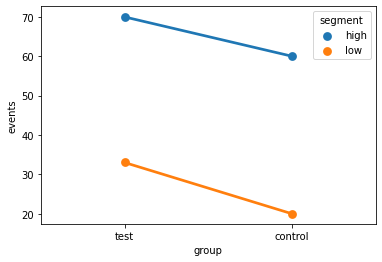

In [74]:
sns.pointplot(data=data2, x='group', y='events', hue='segment')